GROUP 8:
- Alexandre Gonçalves (20240738@novaims.unl.pt)
- Bráulio Damba (20240007@novaims.unl.pt)
- Victoria Goon (20240550@novaims.unl.pt)

# PreProcessing

In [1]:
import numpy as np #to efficiently compute functions
import pandas as pd #to work with data frames
pd.set_option('display.max_columns',100) #to display 100 columns
import matplotlib.pyplot as plt
from math import ceil
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 35) #to display 35 columns
pd.set_option('display.max_rows', 100) #to display 100 rows
import os
import jinja2

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler

from sklearn.impute import KNNImputer

In [2]:
# import the data and ensure the import was done properly
data = pd.read_csv("DM2425_ABCDEats_DATASET.csv")
data.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,...,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# make a copy of the data to have the original untouched
df = data.copy()
df.shape

(31888, 56)

### Remove Duplicates

In [4]:
# find duplicate IDs
dups = df[df.duplicated(subset="customer_id", keep=False)]
dups.shape

(26, 56)

In [5]:
# 26 duplicate pairs found, we will only keep half (13)
df.drop_duplicates(subset="customer_id", keep="first", inplace=True)
print(df.shape)

df_after_dups_length = df.shape[0]

(31875, 56)


### Set ID as index

In [6]:
df = df.set_index("customer_id")
df.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,...,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Identify Numerical vs Categorical

In [7]:
numerical_cols = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']
categorical_cols = df.select_dtypes('object').columns.tolist()

### Determine and Fill Missing Data

columns:
- customer_age
- first_order
- HR_0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31875 non-null  object 
 1   customer_age              31148 non-null  float64
 2   vendor_count              31875 non-null  int64  
 3   product_count             31875 non-null  int64  
 4   is_chain                  31875 non-null  int64  
 5   first_order               31769 non-null  float64
 6   last_order                31875 non-null  int64  
 7   last_promo                31875 non-null  object 
 8   payment_method            31875 non-null  object 
 9   CUI_American              31875 non-null  float64
 10  CUI_Asian                 31875 non-null  float64
 11  CUI_Beverages             31875 non-null  float64
 12  CUI_Cafe                  31875 non-null  float64
 13  CUI_Chicken Dishes        31875 non-null  float64
 1

In [9]:
df["HR_0"].fillna(value=0.0, inplace=True)
df["HR_0"].info()

<class 'pandas.core.series.Series'>
Index: 31875 entries, 1b8f824d5e to fd40d3b0e0
Series name: HR_0
Non-Null Count  Dtype  
--------------  -----  
31875 non-null  float64
dtypes: float64(1)
memory usage: 498.0+ KB


### Remove Customers who didnt place orders

In [10]:
no_orders = len(df[ (df["first_order"].isna()) & (df["last_order"] == 0)])
print(str(no_orders) + " customers that didnt order within the recording timeperiod.")
no_orders = round((no_orders / df_after_dups_length) * 100,2)
print("Will drop the customers who didn't order which is " + str(no_orders) + "% of the data")

y = df[(df["first_order"].isna()) & (df["last_order"] == 0)].index
df.drop(y, inplace=True)
df["first_order"].info() # remove users who didnt order within the time frame

106 customers that didnt order within the recording timeperiod.
Will drop the customers who didn't order which is 0.33% of the data
<class 'pandas.core.series.Series'>
Index: 31769 entries, 1b8f824d5e to d7c7face7e
Series name: first_order
Non-Null Count  Dtype  
--------------  -----  
31769 non-null  float64
dtypes: float64(1)
memory usage: 496.4+ KB


In [11]:
data_removed = no_orders
print("Current Percentage Removed: " + str(data_removed) + "%")

Current Percentage Removed: 0.33%


In [12]:
age_median = round(df["customer_age"].describe(), 2)["50%"]
print("Filling empty age with age median: " + str(age_median))
df["customer_age"].fillna(age_median, inplace=True)

Filling empty age with age median: 26.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31769 entries, 1b8f824d5e to d7c7face7e
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31769 non-null  object 
 1   customer_age              31769 non-null  float64
 2   vendor_count              31769 non-null  int64  
 3   product_count             31769 non-null  int64  
 4   is_chain                  31769 non-null  int64  
 5   first_order               31769 non-null  float64
 6   last_order                31769 non-null  int64  
 7   last_promo                31769 non-null  object 
 8   payment_method            31769 non-null  object 
 9   CUI_American              31769 non-null  float64
 10  CUI_Asian                 31769 non-null  float64
 11  CUI_Beverages             31769 non-null  float64
 12  CUI_Cafe                  31769 non-null  float64
 13  CUI_Chicken Dishes        31769 non-null  float64
 1

### Mismatched Data Types
Changing float64s to ints where reasonable

In [14]:
df = df.astype({"customer_age": int, "first_order": int, "HR_0": int, 
                "product_count": int, "vendor_count": int, "is_chain":int, 
                "last_order": int})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31769 entries, 1b8f824d5e to d7c7face7e
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31769 non-null  object 
 1   customer_age              31769 non-null  int64  
 2   vendor_count              31769 non-null  int64  
 3   product_count             31769 non-null  int64  
 4   is_chain                  31769 non-null  int64  
 5   first_order               31769 non-null  int64  
 6   last_order                31769 non-null  int64  
 7   last_promo                31769 non-null  object 
 8   payment_method            31769 non-null  object 
 9   CUI_American              31769 non-null  float64
 10  CUI_Asian                 31769 non-null  float64
 11  CUI_Beverages             31769 non-null  float64
 12  CUI_Cafe                  31769 non-null  float64
 13  CUI_Chicken Dishes        31769 non-null  float64
 1

### Feature Engineering
- Total Spent: sums up the total amount of money spent in the app across all cuisines
- Spender Segment: dividing customers into spending segments [Low, Mid-Low, Mid-High, High]
- Order Range: calulates the number of days between the first time ordered and last time ordered
- Age Group: dividing customers into age groups [Teen, Young Adult, Adult, Middle-Aged Adult, Older Adult, Senior]
- Cuisine Variety: counts the total number of different cuisines a customer bought from
- Total Orders: adding the total number of orders made in the app by a customer
- Cuisine Spender Segment: dividing cuisines into spending segments
- Meal Times: condenscing hours into habitual meal times
- Weekend / Weedday: [removed]

In [15]:
# Defining groups for ease of creating new features
Cuisines = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                           'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                           'CUI_Thai']

Days = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
                          
Hours = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13',
                           'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

#### Total Spent

In [16]:
total_spent = df[Cuisines].sum(axis=1)
df["total_spent"] = total_spent

#### Spender Segment

In [17]:
# Segment customers into quantiles (e.g., top 25% high spenders)
spender_segment_labels = ['Low', 'Mid-Low', 'Mid-High', 'High']
df["spender_segment"] = pd.qcut(df['total_spent'], q=4, labels=spender_segment_labels)

#### Order Range

In [18]:
order_range = df["last_order"] - df["first_order"]
df["order_range"] = order_range

#### Age Group

In [19]:
# Create more detailed age groups with specified bins and labels
df['age_group'] = pd.cut(df['customer_age'], 
                             bins=[10, 20, 30, 40, 50, 60, 80], 
                             labels=['Teen', 'Young Adult', 'Adult', 'Middle-Aged Adult', 'Older Adult', 'Senior'])

In [20]:
df['age_group'].value_counts()

age_group
Young Adult          20294
Adult                 6264
Teen                  3446
Middle-Aged Adult     1389
Older Adult            300
Senior                  76
Name: count, dtype: int64

#### Cuisine Variety

In [21]:
df['cuisine_variety'] = df[Cuisines].gt(0).sum(axis=1)

#### Cuisine Bin

In [22]:
# def cuisine_bin(amount):
#     if amount > 0:
#         return 1
#     else:
#         return 0

# cuisine_bin_names = []
# for cuisine in Cuisines:
#     name = str(cuisine) + "_bin"
#     cuisine_bin_names.append(name)
#     df[name] = df[cuisine].map(cuisine_bin)

#### Cuisine Spender Segments

In [23]:
# create the cuisine spender segments
cuisine_spend_segments = []
for cuisine in Cuisines:
    name = str(cuisine) + "_spend_segment"
    cuisine_spend_segments.append(name)
    df[name] = pd.qcut(df[df[cuisine] != 0][cuisine], q=4, labels=spender_segment_labels)

# fill NaNs with "None"
for cui_segment in cuisine_spend_segments:
    df[cui_segment] = df[cui_segment].astype({cui_segment: object})
    df[cui_segment].fillna(value="None", inplace=True)

#### Total Orders

In [24]:
# total the number of orders based on days and hours separetly
total_orders_days = df[Days].sum(axis=1)
total_orders_hours = df[Hours].sum(axis=1)

# save them to get the customer ids related to them
df["total_orders_days"] = total_orders_days
df["total_orders_hours"] = total_orders_hours

# find the anomolies
anomolies = df[df["total_orders_days"] != df["total_orders_hours"]]
percent_removed = round((len(anomolies) / len(df) )* 100,2)
print("Number of rows to remove: " + str(len(anomolies)))

# drop the anomolies
df.drop(anomolies.index, inplace=True)
df["total_orders"] = df["total_orders_days"]
df = df.drop(["total_orders_days", "total_orders_hours"], axis=1)
data_removed += percent_removed
print(str(data_removed) + "%")
df.shape

Number of rows to remove: 1163
3.99%


(30606, 76)

In [25]:
df[df["total_orders"] == 0].shape

(138, 76)

In [26]:
df = df[df["total_orders"] != 0]

#### Weedend vs Weekday

In [27]:
# df['Weekend'] = df[['DOW_0', 'DOW_6']].mean(axis=1)
# df['Weekday'] = df[['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']].mean(axis=1)

#### Order Segments per Hour (Meal Time)

In [28]:
Early_Morning = ["HR_1", "HR_2", "HR_3", "HR_4", "HR_5"]
Breakfast = ["HR_6", "HR_7", "HR_8", "HR_9", "HR_10"]
Lunch = ["HR_11", "HR_12", "HR_13", "HR_14", "HR_15"]
Snack = ["HR_16", "HR_17"]
Dinner = ["HR_18", "HR_19", "HR_20", "HR_21", "HR_22"]
Late_Night = ["HR_23", "HR_0"]
meal_times = [Early_Morning, Breakfast, Lunch, Snack, Dinner, Late_Night]
meal_times_str = ["Early_Morning", "Breakfast", "Lunch", "Snack", "Dinner", "Late_Night"]

In [29]:
for meal, meal_str in zip(meal_times, meal_times_str):
    df[meal_str] = df[meal].sum(axis=1)

In [30]:
# add new features to the list of numerical variables
numerical_cols.extend(['order_range', 'cuisine_variety', 'total_orders', 'total_spent'])#, 'Weekend', 'Weekday'])

In [31]:
categorical_cols.extend(cuisine_spend_segments)
# categorical_cols.extend(cuisine_bin_names)
categorical_cols.extend(meal_times_str)
categorical_cols.extend(Days)

### Outliers

#### Overall outlier check
Checing the total number of outliers in the dataset by feature based on IQR

In [32]:
# determine the upper and lower quantiles for all the numerical variables
q1 = df[numerical_cols].quantile(.25)
q3 = df[numerical_cols].quantile(.75)
iqr = (q3 - q1) * 1.5
upper_outlier = q3 + iqr
lower_outlier = q1 - iqr

In [33]:
# create the filters
filters_iqr = []
for metric in numerical_cols:
    llim = lower_outlier[metric]
    ulim = upper_outlier[metric]
    filters_iqr.append(df[metric].between(llim, ulim, inclusive='neither'))

filters_iqr_all = pd.Series(np.all(filters_iqr, 0))


In [34]:
filters_iqr_all.sum()

24053

#### Manual outlier check

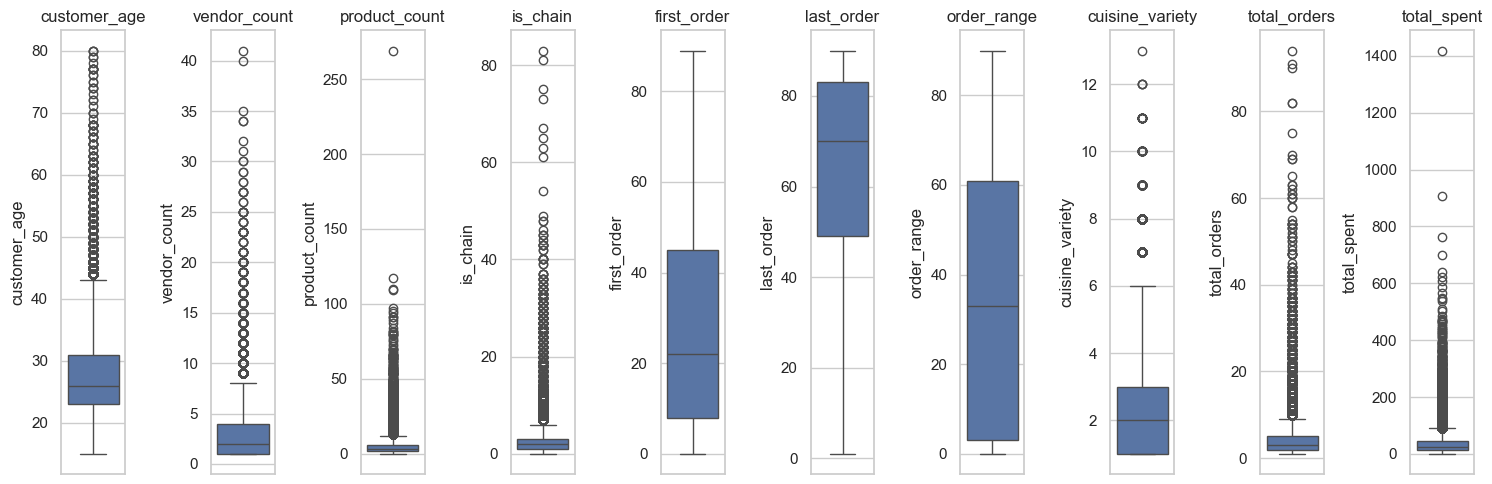

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))
# Loop through each numerical column and plot boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])  # You can adjust orientation or limits if needed
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [36]:
# create ratios for vendor_count, product_count, and is_chain
products_per_orders = (df["product_count"] / df["total_orders"])

chain_per_orders = (df["is_chain"] / df["total_orders"])

vendor_per_orders = (df["vendor_count"] / df["total_orders"])

cuisine_per_orders = (df["cuisine_variety"] / df["total_orders"])

spent_per_orders = (df["total_spent"] / df["total_orders"])

In [37]:
df["products_per_orders"] = products_per_orders
df["chain_per_orders"] = chain_per_orders
df["vendor_per_orders"] = vendor_per_orders
df["cuisine_per_orders"] = cuisine_per_orders
df["spent_per_orders"] = spent_per_orders

#### Display outliers based on ratios created

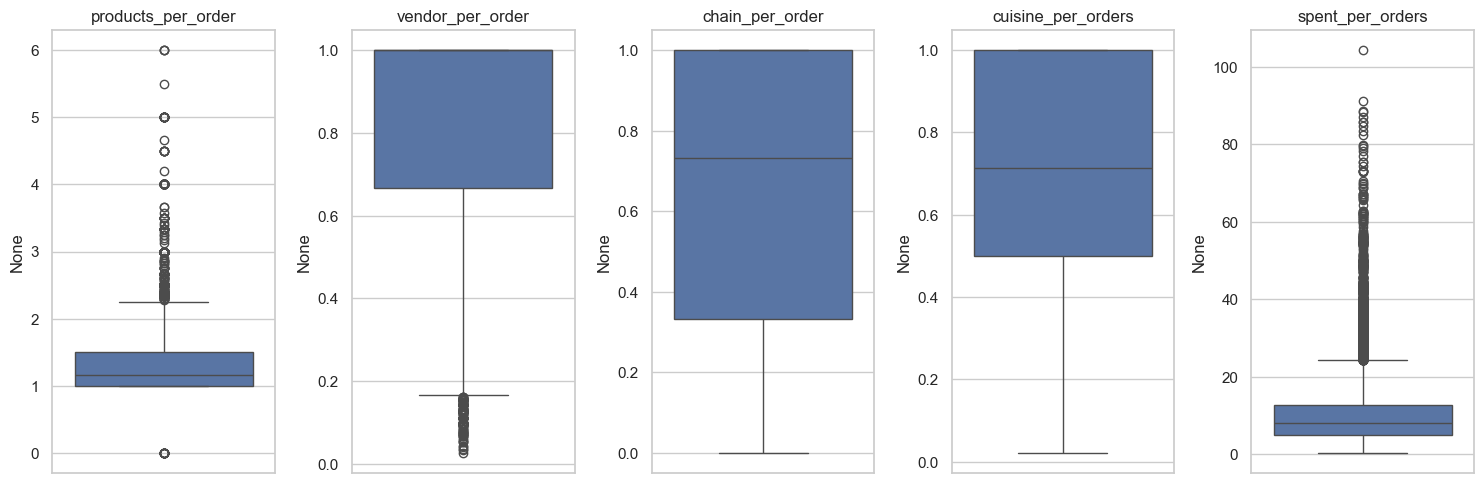

In [38]:
first_subset_numerical = ['products_per_order', 'vendor_per_order', 'chain_per_order', "cuisine_per_orders", "spent_per_orders"]
datasets = [products_per_orders, vendor_per_orders, chain_per_orders, cuisine_per_orders, spent_per_orders]
fig, axes = plt.subplots(nrows=1, ncols=len(first_subset_numerical), figsize=(15, 5))

for i, col in enumerate(first_subset_numerical):
    sns.boxplot(y=datasets[i], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Dealing with outliers
Separate the outliers from the main dataset to cluster them seperately.

In [39]:
# # make another copy of the code to test outlier methods
# df_no_outliers = df.copy()

In [40]:
# qs = products_per_orders.describe()
# iqr = qs["75%"] - qs["25%"]
# upper_product_outliers = qs["75%"] + (1.5 * iqr) # 2.25
# product_rm_len = len(products_per_orders[ products_per_orders > upper_product_outliers])
# product_rm_len += len(products_per_orders[ products_per_orders == 0])
# print(str(product_rm_len) + " outside the range")

In [41]:
# qs = vendor_per_orders.describe()
# iqr = qs["75%"] - qs["25%"]
# lower_vendor_outliers = qs["25%"] - (1.5 * iqr)
# print(str(len(vendor_per_orders[ vendor_per_orders < lower_vendor_outliers])) + " outside the range")

In [42]:
# qs = spent_per_orders.describe()
# iqr = qs["75%"] - qs["25%"]
# upper_spent_outliers = qs["75%"] + (1.5 * iqr)
# print(str(len(spent_per_orders[ spent_per_orders > upper_spent_outliers])) + " outside the range")

In [43]:
df_filtered = df[filters_iqr_all.to_list()]

In [44]:
df_out = df[(~filters_iqr_all).to_list()]

In [45]:
df_out.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,...,CUI_Japanese_spend_segment,CUI_Noodle Dishes_spend_segment,CUI_OTHER_spend_segment,CUI_Street Food / Snacks_spend_segment,CUI_Thai_spend_segment,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f49ed5489a,8670,51,2,2,2,0,4,FREEBIE,CARD,0.00,12.79,6.13,0.00,0.00,0.0,0.0,0.00,...,None,None,None,None,None,2,0,2,0,0,0,0,1.000000,1.0,1.000000,1.000000,9.460000
eb13ad08ad,8670,47,4,6,2,0,5,DELIVERY,CARD,5.98,11.97,0.00,0.00,0.00,0.0,0.0,0.00,...,None,None,None,High,None,4,1,0,2,1,0,0,1.500000,0.5,1.000000,0.750000,18.132500
b92ab1eeec,2360,47,5,6,5,0,6,-,DIGI,3.00,0.00,0.00,5.07,5.59,0.0,0.0,5.58,...,None,None,Low,None,None,5,0,2,3,0,0,0,1.200000,1.0,1.000000,1.000000,4.196000
a9f54fe565,8670,48,2,4,3,0,12,DISCOUNT,CARD,12.59,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,High,None,None,None,None,3,2,1,0,0,0,0,1.333333,1.0,0.666667,0.666667,14.393333
37c312f839,2360,27,4,8,7,0,24,-,CARD,0.00,0.00,0.00,8.51,0.00,0.0,0.0,0.00,...,Low,None,Mid-Low,None,None,7,0,0,1,5,1,0,1.142857,1.0,0.571429,0.428571,2.508571


In [46]:
df_out['age_group'].value_counts()

age_group
Young Adult          3467
Adult                1072
Middle-Aged Adult     958
Teen                  551
Older Adult           293
Senior                 74
Name: count, dtype: int64

In [47]:
df_filtered.shape

(24053, 87)

##### Dataset after outlier separation

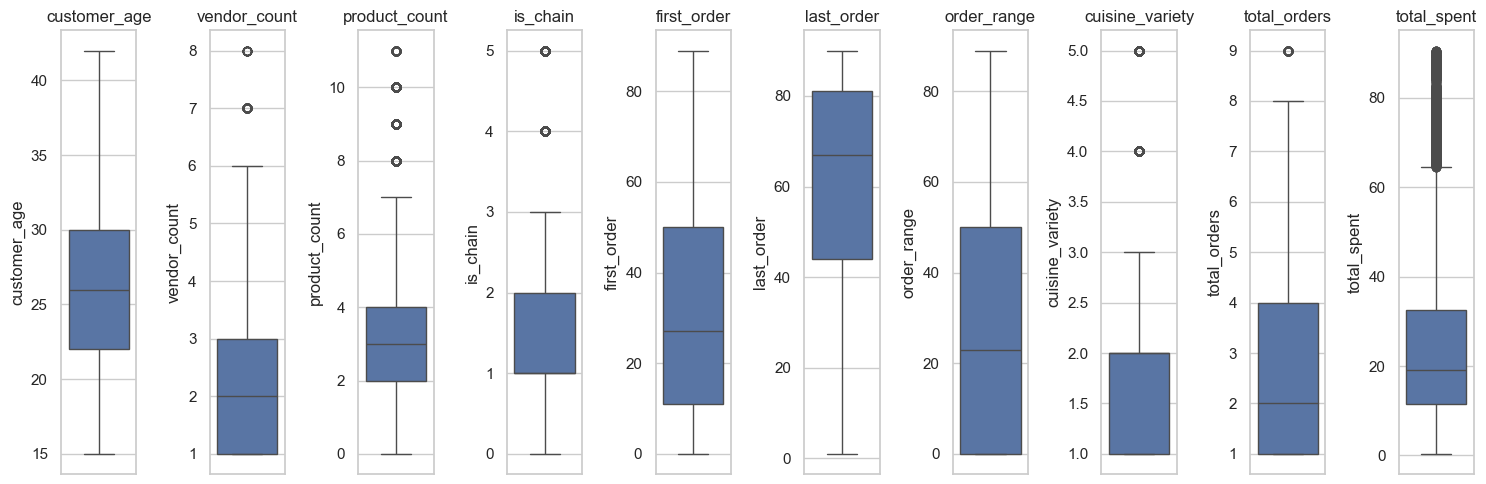

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))
# Loop through each numerical column and plot boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_filtered[col], ax=axes[i])  # You can adjust orientation or limits if needed
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [49]:
# # outlier bowplots
# fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 5))
# # Loop through each numerical column and plot boxplots
# for i, col in enumerate(numerical_cols):
#     sns.boxplot(y=df_out[col], ax=axes[i])
#     axes[i].set_title(col)

# plt.tight_layout()
# plt.show()

In [50]:
df = df_filtered

In [51]:
numerical_cols.extend(["products_per_orders", "chain_per_orders", "vendor_per_orders", "cuisine_per_orders"])

### Feature Selection

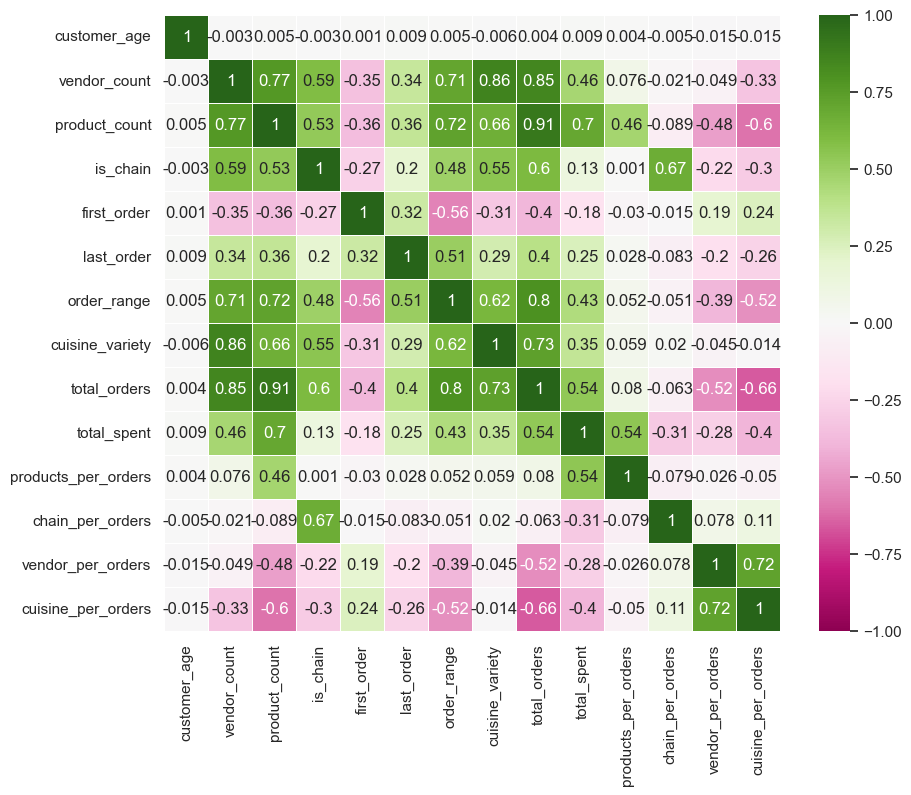

In [52]:
fig = plt.figure(figsize=(10, 8))

# Use spearman correlation 
corr = df[numerical_cols].corr(method="spearman").round(3)

# Plot heatmap
sns.heatmap(data=corr, annot=True, 
            # fmt='s',
            vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [53]:
threshold = 0.85
corr_labels = corr.columns.tolist()
over_threshold = []
for label in corr_labels:
    row = corr[label]
    for i, val in row.items():
        if label == i:
            break
        else:
            if (val > threshold) or (val < (-1 * threshold)):
                over_threshold.append((label, i))

for i in over_threshold:
    print("Feature: [" + str(i[0]).upper() + "] with ["+str(i[1]).upper()+"] are highly correlated")

Feature: [CUISINE_VARIETY] with [VENDOR_COUNT] are highly correlated
Feature: [TOTAL_ORDERS] with [PRODUCT_COUNT] are highly correlated


#### Variance Check

In [54]:
threshold = 0.02
selector = VarianceThreshold(threshold=threshold)

# Fit and transform the data
reduced_data = selector.fit_transform(df[numerical_cols])

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)
selected_feature_names = [numerical_cols[i] for i in selected_features]

removed_feature = numerical_cols[selected_feature_names not in numerical_cols]
print("This/These features were chosen to be removed due to low variance: " + str(removed_feature).upper())

This/These features were chosen to be removed due to low variance: VENDOR_COUNT


Remove Vendor Count and Product Count from the features.

In [55]:
print("Total Features Before: " + str(len(df.columns)))
df.drop(["vendor_count", "product_count"], inplace=True, axis=1)
print("Total Features After: " + str(len(df.columns)))

Total Features Before: 87
Total Features After: 85


In [56]:
# Redo numerical column labels but keep the cuisines, hours, and days removed
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [x for x in numerical_cols if x not in Cuisines]
numerical_cols = [x for x in numerical_cols if x not in Days]
numerical_cols = [x for x in numerical_cols if x not in Hours]
# for x in cuisine_bin_names:
#     numerical_cols.remove(x)
categorical_cols = df.select_dtypes('object').columns.tolist()
categorical_cols.extend(["spender_segment", "age_group"])
# categorical_cols.extend(cuisine_bin_names)
categorical_cols.extend(Days)
categorical_cols.extend(Hours)

In [57]:
df.head()

,customer_region,customer_age,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,...,CUI_Japanese_spend_segment,CUI_Noodle Dishes_spend_segment,CUI_OTHER_spend_segment,CUI_Street Food / Snacks_spend_segment,CUI_Thai_spend_segment,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,...,None,None,None,None,None,2,0,0,0,0,2,0,2.5,0.5,1.0,0.5,14.440
5d272b9dcb,8670,17,2,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,None,None,None,None,None,2,0,1,1,0,0,0,1.0,1.0,1.0,1.0,9.605
f6d1b2ba63,4660,38,2,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,None,None,None,None,None,2,0,1,1,0,0,0,1.0,1.0,0.5,0.5,4.600
180c632ed8,4660,26,1,0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,...,None,None,None,None,None,2,0,0,2,0,0,0,1.5,0.5,1.0,1.0,15.780
4eb37a6705,4660,20,0,0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,None,None,None,None,None,2,0,2,0,0,0,0,2.5,0.0,1.0,1.0,27.720


### Scaling 
Using 3 different scaling methods
- Standard scaling
- Minmax scaling
- Robust scaling

#### Standard Scaling

In [58]:
# scaling for normal data
standard_scaler = StandardScaler()
standard_scaled_feat = standard_scaler.fit_transform(df[numerical_cols])
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=numerical_cols, index=df.index)
standard_scaled_feat_df.describe().round(2)

,customer_age,is_chain,first_order,last_order,total_spent,order_range,cuisine_variety,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders
count,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.10,-1.19,-1.32,-2.53,-1.34,-1.06,-0.91,-1.05,-0.40,-0.58,-0.81,-0.56,-0.56,-0.14,-3.02,-1.53,-3.74,-2.63,-1.29
25%,-0.83,-0.46,-0.87,-0.70,-0.73,-1.06,-0.91,-1.05,-0.40,-0.58,-0.81,-0.56,-0.56,-0.14,-0.65,-0.90,-0.63,-1.10,-0.65
50%,-0.10,-0.46,-0.22,0.28,-0.31,-0.19,0.17,-0.43,-0.40,-0.58,0.13,-0.56,-0.56,-0.14,-0.65,0.13,0.58,0.86,-0.25
75%,0.63,0.28,0.73,0.88,0.44,0.83,0.17,0.82,-0.40,0.56,0.13,0.55,0.58,-0.14,0.53,0.96,0.58,0.86,0.32
max,2.82,2.48,2.32,1.26,3.62,2.30,3.41,3.92,11.49,8.49,7.66,8.33,8.53,25.62,11.16,0.96,0.58,0.86,10.03


In [59]:
# scaling for outlier data
standard_scaler_out = StandardScaler()
standard_scaled_feat_out = standard_scaler_out.fit_transform(df_out[numerical_cols])
standard_scaled_feat_df_out = pd.DataFrame(standard_scaled_feat_out, columns=numerical_cols, index=df_out.index)
standard_scaled_feat_df_out.describe().round(2)

,customer_age,is_chain,first_order,last_order,total_spent,order_range,cuisine_variety,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders
count,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.53,-1.10,-0.86,-4.87,-1.16,-2.55,-1.45,-1.19,-0.39,-0.63,-0.92,-0.67,-0.65,-0.21,-3.45,-2.12,-2.65,-1.89,-1.12
25%,-0.76,-0.63,-0.69,-0.29,-0.70,-0.47,-0.94,-0.55,-0.39,-0.63,-0.66,-0.67,-0.65,-0.21,-0.63,-0.71,-0.75,-0.73,-0.65
50%,-0.38,-0.17,-0.40,0.42,-0.22,0.32,0.09,-0.17,-0.39,-0.32,-0.14,-0.29,-0.35,-0.21,-0.22,0.30,0.06,-0.19,-0.32
75%,0.48,0.30,0.36,0.68,0.38,0.77,0.60,0.35,-0.39,0.29,0.37,0.48,0.26,-0.21,0.31,0.99,0.82,0.52,0.32
max,4.67,11.81,4.19,0.87,18.40,1.19,4.70,10.71,13.22,21.36,13.25,10.85,14.72,28.57,11.62,0.99,1.27,2.19,11.64


#### MinMax Scaling

In [60]:
# scaling for normal data
minmax_scaler = MinMaxScaler()
minmax_scaled_feat = minmax_scaler.fit_transform(df[numerical_cols])
minmax_scaled_feat_df = pd.DataFrame(minmax_scaled_feat, columns=numerical_cols, index=df.index)
minmax_scaled_feat_df.describe().round(2)

,customer_age,is_chain,first_order,last_order,total_spent,order_range,cuisine_variety,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders
count,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00
mean,0.43,0.32,0.36,0.67,0.27,0.31,0.21,0.21,0.03,0.06,0.10,0.06,0.06,0.01,0.21,0.61,0.87,0.75,0.11
std,0.20,0.27,0.27,0.26,0.20,0.30,0.23,0.20,0.08,0.11,0.12,0.11,0.11,0.04,0.07,0.40,0.23,0.29,0.09
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.26,0.20,0.12,0.48,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.25,0.72,0.44,0.06
50%,0.41,0.20,0.30,0.74,0.21,0.26,0.25,0.12,0.00,0.00,0.11,0.00,0.00,0.00,0.17,0.67,1.00,1.00,0.09
75%,0.56,0.40,0.56,0.90,0.36,0.56,0.25,0.38,0.00,0.12,0.11,0.12,0.12,0.00,0.25,1.00,1.00,1.00,0.14
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [61]:
# scaling for outlier data
minmax_scaler_out = MinMaxScaler()
minmax_scaled_feat_out = minmax_scaler_out.fit_transform(df_out[numerical_cols])
minmax_scaled_feat_df_out = pd.DataFrame(minmax_scaled_feat_out, columns=numerical_cols, index=df_out.index)
minmax_scaled_feat_df_out.describe().round(2)

,customer_age,is_chain,first_order,last_order,total_spent,order_range,cuisine_variety,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders
count,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00
mean,0.25,0.09,0.17,0.85,0.06,0.68,0.24,0.10,0.03,0.03,0.06,0.06,0.04,0.01,0.23,0.68,0.68,0.46,0.09
std,0.16,0.08,0.20,0.17,0.05,0.27,0.16,0.08,0.07,0.05,0.07,0.09,0.07,0.03,0.07,0.32,0.26,0.24,0.08
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.12,0.04,0.03,0.80,0.02,0.56,0.08,0.05,0.00,0.00,0.02,0.00,0.00,0.00,0.19,0.45,0.49,0.28,0.04
50%,0.18,0.07,0.09,0.92,0.05,0.77,0.25,0.09,0.00,0.01,0.05,0.03,0.02,0.00,0.21,0.78,0.69,0.42,0.06
75%,0.32,0.11,0.24,0.97,0.08,0.89,0.33,0.13,0.00,0.04,0.09,0.10,0.06,0.00,0.25,1.00,0.89,0.59,0.11
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Robust Scaling

In [62]:
robust_scaler = RobustScaler()
robust_scaled_feat = robust_scaler.fit_transform(df[numerical_cols])
robust_scaled_feat_df = pd.DataFrame(robust_scaled_feat, columns=numerical_cols, index=df.index)
robust_scaled_feat_df.describe().round(2)

,customer_age,is_chain,first_order,last_order,total_spent,order_range,cuisine_variety,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders
count,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.0,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00,24053.00
mean,0.07,0.62,0.14,-0.18,0.26,0.10,-0.16,0.23,0.30,0.51,-0.14,0.5,0.49,0.02,0.55,-0.07,-0.48,-0.44,0.26
std,0.69,1.36,0.63,0.63,0.86,0.53,0.93,0.54,0.76,0.88,1.06,0.9,0.88,0.16,0.85,0.54,0.82,0.51,1.03
min,-1.38,-1.00,-0.69,-1.78,-0.89,-0.46,-1.00,-0.33,0.00,0.00,-1.00,0.0,0.00,0.00,-2.00,-0.89,-3.56,-1.78,-1.07
25%,-0.50,0.00,-0.41,-0.62,-0.37,-0.46,-1.00,-0.33,0.00,0.00,-1.00,0.0,0.00,0.00,0.00,-0.56,-1.00,-1.00,-0.41
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.50,1.00,0.59,0.38,0.63,0.54,0.00,0.67,0.00,1.00,0.00,1.0,1.00,0.00,1.00,0.44,0.00,0.00,0.59
max,2.00,4.00,1.59,0.62,3.36,1.32,3.00,2.33,9.00,8.00,8.00,8.0,8.00,4.00,10.00,0.44,0.00,0.00,10.58


In [63]:
robust_scaler_out = RobustScaler()
robust_scaled_feat_out = robust_scaler_out.fit_transform(df_out[numerical_cols])
robust_scaled_feat_df_out = pd.DataFrame(robust_scaled_feat_out, columns=numerical_cols, index=df_out.index)
robust_scaled_feat_df_out.describe().round(2)

,customer_age,is_chain,first_order,last_order,total_spent,order_range,cuisine_variety,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders
count,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00,6415.00
mean,0.31,0.18,0.39,-0.43,0.21,-0.25,-0.06,0.18,0.71,0.35,0.14,0.25,0.38,0.08,0.24,-0.18,-0.04,0.15,0.33
std,0.81,1.07,0.95,1.03,0.93,0.80,0.65,1.12,1.84,1.09,0.97,0.87,1.11,0.38,1.06,0.59,0.64,0.80,1.03
min,-0.92,-1.00,-0.43,-5.47,-0.87,-2.30,-1.00,-1.14,0.00,-0.33,-0.75,-0.33,-0.33,0.00,-3.43,-1.43,-1.73,-1.36,-0.82
25%,-0.31,-0.50,-0.27,-0.73,-0.44,-0.63,-0.67,-0.43,0.00,-0.33,-0.50,-0.33,-0.33,0.00,-0.43,-0.59,-0.51,-0.43,-0.34
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.69,0.50,0.73,0.27,0.56,0.37,0.33,0.57,0.00,0.67,0.50,0.67,0.67,0.00,0.57,0.41,0.49,0.57,0.66
max,4.08,12.83,4.38,0.47,17.33,0.70,3.00,12.14,25.00,23.67,13.00,9.67,16.67,11.00,12.57,0.41,0.77,1.90,12.28


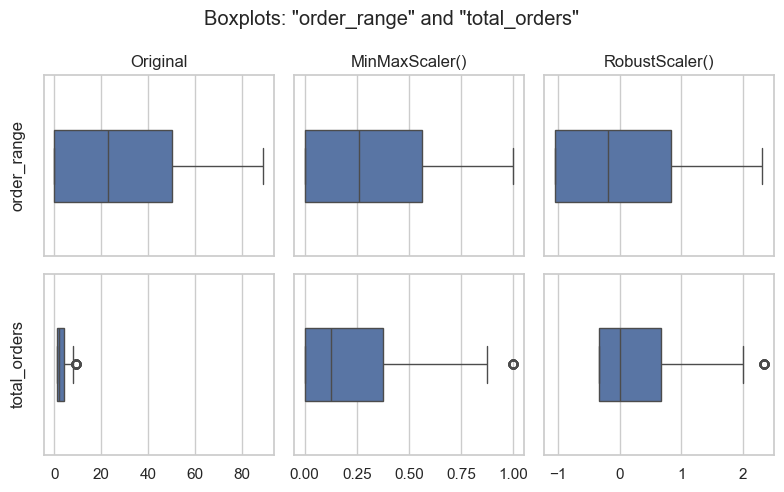

In [64]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2,3, figsize=(8,5), tight_layout=True, sharex='col', sharey='row')

bp_feat_l = 'order_range'

sns.boxplot(df, x=bp_feat_l, ax=axes[0][0], width=.4)
axes[0][0].set_title('Original')
axes[0][0].set_ylabel(bp_feat_l)

sns.boxplot(minmax_scaled_feat_df, x=bp_feat_l, ax=axes[0][1], width=.4)
axes[0][1].set_title('MinMaxScaler()')

sns.boxplot(standard_scaled_feat_df, x=bp_feat_l, ax=axes[0][2], width=.4)
axes[0][2].set_title('RobustScaler()')

bp_feat_r = 'total_orders'

sns.boxplot(df, x=bp_feat_r, ax=axes[1][0], width=.4)
axes[1][0].set_ylabel(bp_feat_r)

sns.boxplot(minmax_scaled_feat_df, x=bp_feat_r, ax=axes[1][1], width=.4)

sns.boxplot(robust_scaled_feat_df, x=bp_feat_r, ax=axes[1][2], width=.4)

axes[1][0].set_xlabel(None)
axes[1][1].set_xlabel(None)
axes[1][2].set_xlabel(None)

fig.suptitle('Boxplots: "{}" and "{}"'.format(bp_feat_l, bp_feat_r))
plt.show()

#### Separating categorical features from metric

In [65]:
categorical_cols

['customer_region',
 'last_promo',
 'payment_method',
 'CUI_American_spend_segment',
 'CUI_Asian_spend_segment',
 'CUI_Beverages_spend_segment',
 'CUI_Cafe_spend_segment',
 'CUI_Chicken Dishes_spend_segment',
 'CUI_Chinese_spend_segment',
 'CUI_Desserts_spend_segment',
 'CUI_Healthy_spend_segment',
 'CUI_Indian_spend_segment',
 'CUI_Italian_spend_segment',
 'CUI_Japanese_spend_segment',
 'CUI_Noodle Dishes_spend_segment',
 'CUI_OTHER_spend_segment',
 'CUI_Street Food / Snacks_spend_segment',
 'CUI_Thai_spend_segment',
 'spender_segment',
 'age_group',
 'DOW_0',
 'DOW_1',
 'DOW_2',
 'DOW_3',
 'DOW_4',
 'DOW_5',
 'DOW_6',
 'HR_0',
 'HR_1',
 'HR_2',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23']

In [66]:
categorical_cols = [item for item in categorical_cols if item not in Hours]
categorical_cols

['customer_region',
 'last_promo',
 'payment_method',
 'CUI_American_spend_segment',
 'CUI_Asian_spend_segment',
 'CUI_Beverages_spend_segment',
 'CUI_Cafe_spend_segment',
 'CUI_Chicken Dishes_spend_segment',
 'CUI_Chinese_spend_segment',
 'CUI_Desserts_spend_segment',
 'CUI_Healthy_spend_segment',
 'CUI_Indian_spend_segment',
 'CUI_Italian_spend_segment',
 'CUI_Japanese_spend_segment',
 'CUI_Noodle Dishes_spend_segment',
 'CUI_OTHER_spend_segment',
 'CUI_Street Food / Snacks_spend_segment',
 'CUI_Thai_spend_segment',
 'spender_segment',
 'age_group',
 'DOW_0',
 'DOW_1',
 'DOW_2',
 'DOW_3',
 'DOW_4',
 'DOW_5',
 'DOW_6']

In [67]:
df_categorical = df[categorical_cols]
df.drop(columns=categorical_cols, axis=1, inplace=True)
df_out.drop(columns=categorical_cols, axis=1, inplace=True)
df_categorical.head()

,customer_region,last_promo,payment_method,CUI_American_spend_segment,CUI_Asian_spend_segment,CUI_Beverages_spend_segment,CUI_Cafe_spend_segment,CUI_Chicken Dishes_spend_segment,CUI_Chinese_spend_segment,CUI_Desserts_spend_segment,CUI_Healthy_spend_segment,CUI_Indian_spend_segment,CUI_Italian_spend_segment,CUI_Japanese_spend_segment,CUI_Noodle Dishes_spend_segment,CUI_OTHER_spend_segment,CUI_Street Food / Snacks_spend_segment,CUI_Thai_spend_segment,spender_segment,age_group,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,DELIVERY,DIGI,None,None,None,None,None,None,None,None,High,None,None,None,None,None,None,Mid-High,Teen,1,0,0,0,0,0,1
5d272b9dcb,8670,DISCOUNT,DIGI,Mid-High,Low,None,None,None,None,None,None,None,None,None,None,None,None,None,Mid-Low,Teen,1,0,0,0,0,0,1
f6d1b2ba63,4660,DISCOUNT,CASH,Mid-Low,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Low,Adult,1,0,0,0,0,0,1
180c632ed8,4660,DELIVERY,DIGI,None,Mid-Low,None,None,None,None,None,None,High,None,None,None,None,None,None,Mid-High,Young Adult,0,1,0,0,0,0,1
4eb37a6705,4660,-,DIGI,Mid-High,High,None,None,None,None,None,None,None,None,None,None,None,None,None,High,Teen,0,1,0,0,0,0,1


#### Save categorical to its own dataset

In [68]:
df_categorical.to_csv("categorical_data_preprocessed.csv", index=True)

In [69]:
df.columns

Index(['customer_age', 'is_chain', 'first_order', 'last_order', 'CUI_American',
       'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes',
       'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian',
       'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_spent', 'order_range',
       'cuisine_variety', 'total_orders', 'Early_Morning', 'Breakfast',
       'Lunch', 'Snack', 'Dinner', 'Late_Night', 'products_per_orders',
       'chain_per_orders', 'vendor_per_orders', 'cuisine_per_orders',
       'spent_per_orders'],
      dtype='object')

In [70]:
df_out.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,...,HR_22,HR_23,total_spent,order_range,cuisine_variety,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f49ed5489a,51,2,2,2,0,4,0.00,12.79,6.13,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,...,0,0,18.92,4,2,2,0,2,0,0,0,0,1.000000,1.0,1.000000,1.000000,9.460000
eb13ad08ad,47,4,6,2,0,5,5.98,11.97,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,...,0,0,72.53,5,3,4,1,0,2,1,0,0,1.500000,0.5,1.000000,0.750000,18.132500
b92ab1eeec,47,5,6,5,0,6,3.00,0.00,0.00,5.07,5.59,0.0,0.0,5.58,0.0,0.0,0.00,...,0,0,20.98,6,5,5,0,2,3,0,0,0,1.200000,1.0,1.000000,1.000000,4.196000
a9f54fe565,48,2,4,3,0,12,12.59,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,30.59,...,0,0,43.18,12,2,3,2,1,0,0,0,0,1.333333,1.0,0.666667,0.666667,14.393333
37c312f839,27,4,8,7,0,24,0.00,0.00,0.00,8.51,0.00,0.0,0.0,0.00,0.0,0.0,1.98,...,0,0,17.56,24,3,7,0,0,1,5,1,0,1.142857,1.0,0.571429,0.428571,2.508571


In [71]:
# df_copy = df.drop(columns=Cuisines)
df_copy = df.drop(columns=Cuisines)
# df_copy = df_copy.drop(columns=Days)
df_copy = df_copy.drop(columns=Hours)
# df_copy = df_copy.copy()

# df_copy_out = df_out.copy()
df_copy_out = df_out.drop(columns=Cuisines)
df_copy_out = df_copy_out.drop(columns=Hours)
# df_copy_out = df_copy_out.drop(columns=Days)

In [72]:
df_copy_out.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,total_spent,order_range,cuisine_variety,total_orders,Early_Morning,Breakfast,Lunch,Snack,Dinner,Late_Night,products_per_orders,chain_per_orders,vendor_per_orders,cuisine_per_orders,spent_per_orders
customer_id,,,,,,,,,,,,,,,,,,,,,
f49ed5489a,51,2,2,2,0,4,18.92,4,2,2,0,2,0,0,0,0,1.000000,1.0,1.000000,1.000000,9.460000
eb13ad08ad,47,4,6,2,0,5,72.53,5,3,4,1,0,2,1,0,0,1.500000,0.5,1.000000,0.750000,18.132500
b92ab1eeec,47,5,6,5,0,6,20.98,6,5,5,0,2,3,0,0,0,1.200000,1.0,1.000000,1.000000,4.196000
a9f54fe565,48,2,4,3,0,12,43.18,12,2,3,2,1,0,0,0,0,1.333333,1.0,0.666667,0.666667,14.393333
37c312f839,27,4,8,7,0,24,17.56,24,3,7,0,0,1,5,1,0,1.142857,1.0,0.571429,0.428571,2.508571


In [73]:
# add the scaled numeric features
std_df_all = pd.concat([df_copy.drop(columns=numerical_cols), standard_scaled_feat_df], axis=1)
mm_df_all = pd.concat([df_copy.drop(columns=numerical_cols), minmax_scaled_feat_df], axis=1)

# add the scaled numeric features
std_df_all_out = pd.concat([df_copy_out.drop(columns=numerical_cols), standard_scaled_feat_df_out], axis=1)
mm_df_all_out = pd.concat([df_copy_out.drop(columns=numerical_cols), minmax_scaled_feat_df_out], axis=1)

In [74]:
std_df_all.to_csv("std_data_preprocessed.csv", index=True)
std_df_all_out.to_csv("std_data_preprocessed_out.csv", index=True)

mm_df_all.to_csv("minmax_data_preprocessed.csv", index=True)
mm_df_all_out.to_csv("minmax_data_preprocessed_out.csv", index=True)

In [75]:
# add the scaled numeric features
std_df = pd.concat([df_copy.drop(columns=numerical_cols), standard_scaled_feat_df], axis=1)
mm_df = pd.concat([df_copy.drop(columns=numerical_cols), minmax_scaled_feat_df], axis=1)

# add the outlier scaled numeric features
std_df_out = pd.concat([df_copy_out.drop(columns=numerical_cols), standard_scaled_feat_df_out], axis=1)
mm_df_out = pd.concat([df_copy_out.drop(columns=numerical_cols), minmax_scaled_feat_df_out], axis=1)

In [76]:
std_df.to_csv("std_data_preprocessed_wo_cui_day_hr.csv", index=True)
mm_df.to_csv("minmax_data_preprocessed_wo_cui_day_hr.csv", index=True)

std_df_out.to_csv("std_data_preprocessed_wo_cui_day_hr_out.csv", index=True)
mm_df_out.to_csv("minmax_data_preprocessed_wo_cui_day_hr_out.csv", index=True)

---

### PCA

- ChatGPT was used to recommend options for data that is meaningfully grouped together but individually sparce in data (aka: the Cuisine features)
- PCA was removed from the clustering as it produced less defined clusters and it also resulted in a loss of interpretability

In [77]:
# desired_variance = 0.95 
# pca = PCA()
# pca.fit(df_transformed)

# # Cumulative explained variance
# cumulative_variance = pca.explained_variance_ratio_.cumsum()

# # Finding the number of components that explain at least the `desired_variance`
# n_components = (cumulative_variance >= desired_variance).argmax() + 1

# print(f"Number of components to keep: {n_components}")

In [78]:
# pca_final = PCA(n_components=11, random_state=42)
# pca_df = pca_final.fit_transform(df_transformed)

# # Convert the result into a DataFrame with appropriate column names
# pca_columns = [f'PC{i+1}' for i in range(11)]
# df_pca = pd.DataFrame(pca_df, columns=pca_columns)
# df_pca

In [79]:
# std_df_cuisines = std_df_all[Cuisines]
# std_df_cuisines

In [80]:
# pca = PCA()
# pca_feat = pca.fit_transform(std_df_cuisines)
# pca_feat

In [81]:
# # Get PCA output as table

# # Get the eigenvalues (explained variance)
# explained_variance = pca.explained_variance_

# # Get the explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_

# # get the cumulative explained variance ratio 
# cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# # Combine into a dataframe
# pca_results = pd.DataFrame(
#     {
#         "Eigenvalue": explained_variance,
#         "Difference": np.insert(np.diff(explained_variance), 0, 0),
#         "Proportion": explained_variance_ratio,
#         "Cumulative": cumulative_explained_variance_ratio
#     },
#         index=range(1, pca.n_components_ + 1)
# )

# # pca_results

In [82]:
# # figure and axes
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# # draw plots

# ax1.plot(explained_variance, # PLOT THE EIGENVALUES (EXPLAINED VARIANCE)
#          marker=".", markersize=12)

# ax2.plot(explained_variance_ratio,  # PLOT THE EXPLAINED VARIANCE RATIO
#          marker=".", markersize=12, label="Proportion")

# ax2.plot(cumulative_explained_variance_ratio,  # PLOT THE CUMULATIVE EXPLAINED VARIANCE RATIO
#          marker=".", markersize=12, linestyle="--", label="Cumulative")

# # customizations
# ax2.legend()
# ax1.set_title("Scree Plot", fontsize=14)
# ax2.set_title("Variance Explained", fontsize=14)
# ax1.set_ylabel("Eigenvalue")
# ax2.set_ylabel("Proportion")
# ax1.set_xlabel("Components")
# ax2.set_xlabel("Components")
# ax1.set_xticks(range(0, pca.n_components_, 2))
# ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
# ax2.set_xticks(range(0, pca.n_components_, 2))
# ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

# plt.show()

ChatGPT used to help set a threshold based on cumulative explained variance as the elbow method was too vague in deciding the best number of components

- Exploratory Data Analysis (EDA): Possible to accept a lower threshold (e.g., 70%) to simplify interpretation.
- Predictive Modeling: Best for a higher threshold (e.g., 95%) to minimize information loss.

In [83]:
# # Perform PCA again with the number of principal components you want to retain
# threshold = 0.90
# n_components = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1
# pca = PCA(n_components=n_components)
# pca_feat = pca.fit_transform(std_df_cuisines)
# pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# # remember index=df_pca.index
# pca_df = pd.DataFrame(pca_feat, index=std_df_cuisines.index, columns=pca_feat_names)  
# pca_df

In [84]:
# # Reassigning df to contain pca variables
# df_pca = pd.concat([std_df_cuisines, pca_df], axis=1)
# df_pca.head()

ChatGPT used to help define feature ranking of PCA

In [85]:
# loadings_corr = df_pca[Cuisines + pca_feat_names].corr().loc[Cuisines, pca_feat_names] 
# loadings = pca.components_
# feature_importance = np.abs(loadings).sum(axis=0)
# feature_ranking = np.argsort(feature_importance)[::-1]

In [86]:
# # Example feature names
# feature_names = [f"{Cuisines[i]}" for i in range(len(Cuisines))]

# # Create a DataFrame with rankings
# ranking_df = pd.DataFrame({
#     "Feature": feature_names,
#     "Importance": feature_importance
# }).sort_values(by="Importance", ascending=False)

# print(ranking_df)

In [87]:
# def _color_red_or_green(val):
#     if val < -0.45:
#         color = 'background-color: #915764'
#     elif val > 0.45:
#         color = 'background-color: #5d996d'
#     else:
#         color = ''
#     return color

# # Interpreting each Principal Component
# loadings_corr.style.map(_color_red_or_green)

In [88]:
# pca_df

In [89]:
# df_copy = df[standard_scaled_feat_df.columns].copy()

In [90]:
# df_copy.columns

In [91]:
# standard_scaled_feat_df.columns

In [92]:
# standard_scaler = StandardScaler()

# std_df_all = pd.concat([df_copy, pca_df], axis=1)

In [93]:
# standard_scaled_feat_df

In [94]:
# standard_scaled_feat = standard_scaler.fit_transform(std_df_all)
# standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=std_df_all.columns.to_list(), index=std_df_all.index)

In [95]:
# standard_scaled_feat_df.head()

In [96]:
# standard_scaled_feat_df.to_csv("std_pca_data_preprocessed.csv", index=True)